In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-whitegrid')

%matplotlib inline

# Setting the max width of the returned DF taables
pd.set_option('max_colwidth', -1)

df = pd.read_csv('HR_train.csv')
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [160]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
df.columns = df.columns.str.lower()
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14499 entries, 0 to 14498
Data columns (total 10 columns):
satisfaction_level       14499 non-null float64
last_evaluation          14499 non-null float64
number_project           14499 non-null int64
average_montly_hours     14499 non-null int64
time_spend_company       14499 non-null int64
work_accident            14499 non-null int64
left                     14499 non-null int64
promotion_last_5years    14499 non-null int64
department               14499 non-null object
salary                   14499 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [163]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000,14499.000000
mean,0.615262,0.716238,3.802538,201.074764,3.497483,0.145941,0.228912,0.022002
std,0.247623,0.170850,1.222283,49.828412,1.471452,0.353059,0.420147,0.146693
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


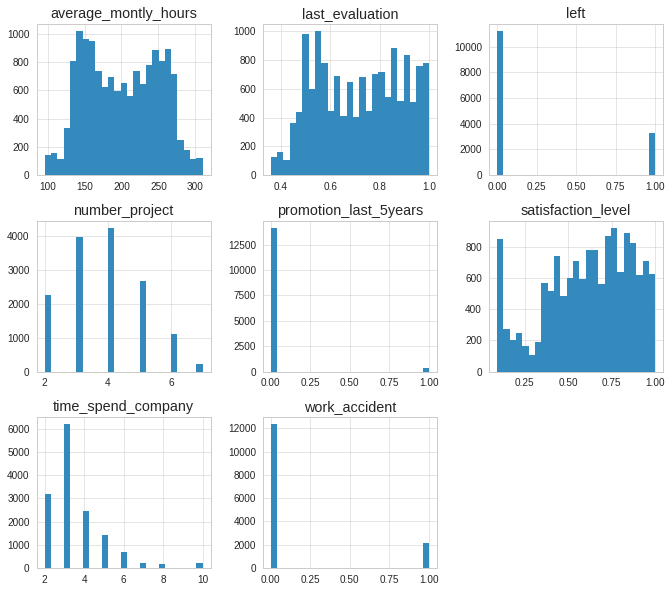

In [164]:
df.hist(bins=25, figsize=(10, 10))
plt.show()

#### Having a look at department vs salary vs retention

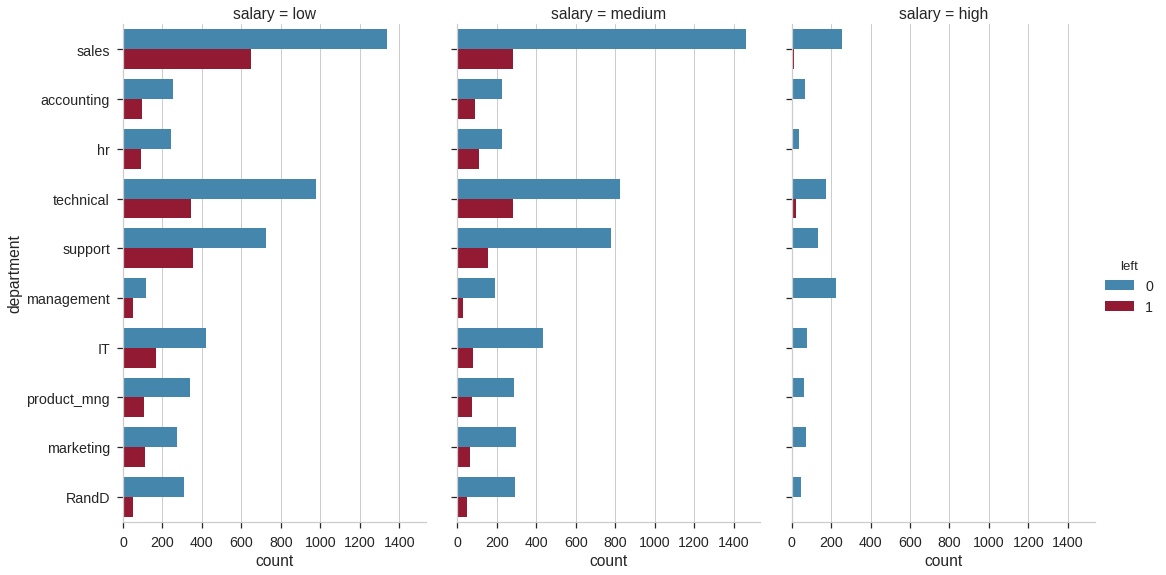

In [165]:
with plt.rc_context(dict(**sns.plotting_context("notebook", font_scale=1.3))):
    sns.catplot(y='department', hue="left", col="salary",
                data=df, kind="count",
                height=8, aspect=.65)

#### Correlation

In [166]:
corr = df.corr()
corr['left'].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.140673
average_montly_hours     0.071926
number_project           0.024764
last_evaluation          0.007730
promotion_last_5years   -0.060459
work_accident           -0.153622
satisfaction_level      -0.383787
Name: left, dtype: float64

The biggest possitive correlation have satisfaction_level and work_accident.<br>
The biggest negative correlation have time_spend_company  and average_monthly_hours.

Now putting everything to the power of 2 to sort by impact

In [167]:
(corr['left'] ** 2).sort_values(ascending=False)

left                     1.000000
satisfaction_level       0.147293
work_accident            0.023600
time_spend_company       0.019789
average_montly_hours     0.005173
promotion_last_5years    0.003655
number_project           0.000613
last_evaluation          0.000060
Name: left, dtype: float64

#### Adding dummy variables to work with department and salary data

In [168]:
salary_n = pd.get_dummies(df.salary)
salary_n.head(3)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1


In [169]:
department_n = pd.get_dummies(df.department)
department_n.head(3)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0


#### Checking correlation with salary and department data

In [170]:
df_full = pd.concat([df, salary_n, department_n], axis=1)
df_full.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0


In [171]:
corr_full = df_full.corr()
# Drop the 'left' row
corr_full.drop('left', inplace=True)
# To the power of 2
corr_full = corr_full['left'] ** 2
corr_full.sort_values(ascending=False)

satisfaction_level       0.147293
work_accident            0.023600
time_spend_company       0.019789
low                      0.018920
high                     0.014680
average_montly_hours     0.005173
medium                   0.005013
promotion_last_5years    0.003655
RandD                    0.002774
management               0.002167
hr                       0.000936
number_project           0.000613
technical                0.000443
accounting               0.000266
product_mng              0.000130
support                  0.000127
sales                    0.000124
IT                       0.000121
last_evaluation          0.000060
marketing                0.000004
Name: left, dtype: float64

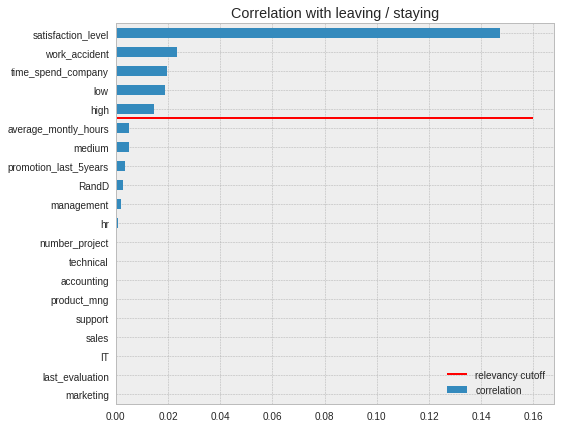

In [225]:
plt.figure(figsize=(7, 7))
plt.title('Correlation with leaving / staying')
plt.hlines(14.5, 0, 0.16, colors='r', linestyles='solid', label='relevancy cutoff')
corr_full.sort_values().plot(kind='barh', label='correlation')
plt.legend(loc='lower right')

#### Calculating 'left' percentages by salary

In [173]:
df_sal = pd.concat([df.left, salary_n], axis=1)
df_sal.head(3)

,left,high,low,medium
0,1,0,1,0
1,1,0,0,1
2,1,0,0,1


In [174]:
df_sal.groupby('left').sum()

,high,low,medium
left,,,
0,1149.0,5002.0,5029.0
1,75.0,2028.0,1216.0


In [175]:
# Filter
f_left = df_sal.left == 1

# Applying
sal_left = df_sal[f_left]
sal_left.head(3)

,left,high,low,medium
0,1,0,1,0
1,1,0,0,1
2,1,0,0,1


In [176]:
num_left_sal = sal_left.groupby('left').sum()
num_left_sal

,high,low,medium
left,,,
1,75.0,2028.0,1216.0


Calculation

In [177]:
perc_left_sal = num_left_sal / df_sal.groupby('left').sum().sum() * 100
perc_left_sal

,high,low,medium
left,,,
1,6.127451,28.847795,19.471577


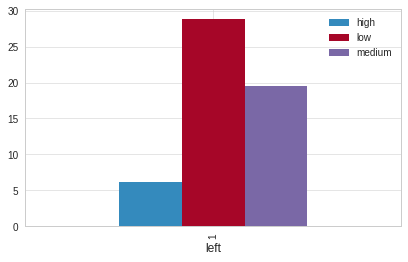

In [178]:
perc_left_sal.plot(kind='bar', figsize=(6, 4))
plt.show()

Clearly the height of the salary is an important factor

### Creating the training dataframe

In [179]:
# Drop one col from salary and department to avoid dummy var trap
salary_n1 = salary_n.drop('medium', axis=1)
salary_n1.head(3)

,high,low
0,0,1
1,0,0
2,0,0


In [180]:
department_n1 = department_n.drop('IT', axis=1)
department_n1.head(3)

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0


In [181]:
# Concatenate and drop the old columns
df_train = pd.concat([df, salary_n1, department_n1], axis=1)
df_train.drop(['salary', 'department'], axis=1, inplace=True)
df_train.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,high,low,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Training

In [182]:
from sklearn.model_selection import train_test_split

# All columns
X = df_train.loc[:, df_train.columns != 'left']
# Significant columns only
X_sig = df_train[['satisfaction_level', 'time_spend_company', 'work_accident', 'low', 'high']]

y = df_train['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.98, random_state=20)
X_train_sig, X_test_sig, y_train_sig, y_test_sig = train_test_split(X_sig, y, train_size=0.98, random_state=20)

In [183]:
len(X_train)

14209

In [184]:
len(X_test)

290

In [185]:
X_train_sig.shape

(14209, 5)

In [186]:
X_test_sig.shape

(290, 5)

### Models

#### Logistic Regression

In [188]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [189]:
log_reg_sig = LogisticRegression(max_iter=2000)
log_reg_sig.fit(X_train_sig, y_train_sig)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Decision Tree

In [190]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### SVM

In [193]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Stochastic Gradient Descent

In [194]:
sgd = SGDClassifier(alpha=0.5, loss='hinge')
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.5, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### Naive Bayes

In [196]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### K Nearest Neighbors

In [197]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [198]:
knn_sig = neighbors.KNeighborsClassifier()
knn_sig.fit(X_train_sig, y_train_sig)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Linear discriminant analysis

In [199]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

#### Random Forrest

In [200]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Gradient Boost

In [201]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Importing the real data

In [202]:
df_test = pd.read_csv('HR_test.csv')
df_test.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.89,0.96,4,219,6,0,1,0,product_mng,medium
1,0.09,0.91,6,243,4,0,1,0,product_mng,high
2,0.88,0.97,4,255,5,1,1,0,IT,low


In [203]:
salary_n1 = pd.get_dummies(df_test.salary)
department_n1 = pd.get_dummies(df_test.department)

In [204]:
salary_n1.drop('medium', axis=1, inplace=True)

In [205]:
department_n1.drop('IT', axis=1, inplace=True)

In [206]:
df_test = pd.concat([df_test, salary_n1, department_n1], axis=1)
df_test.drop(['salary', 'department'], axis=1, inplace=True)
df_test.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,high,low,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.89,0.96,4,219,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.09,0.91,6,243,4,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,0.88,0.97,4,255,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0


In [207]:
X1 = df_test.loc[:, df_train.columns != 'left']
X1_sig = df_test[['satisfaction_level', 'time_spend_company', 'work_accident', 'low', 'high']]
y1 = df_test['left']

In [208]:
len(y1)

500

### Testing

In [209]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# # Import models if necessary
# from sklearn.linear_model import LogisticRegression
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn import neighbors
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier

def model_test(X, y):
    # Prepare configuration for cross validation test harness
    seed = 7

    # Prepare models
    models = [('LR', LogisticRegression(max_iter=2000)),
              ('LDA', LinearDiscriminantAnalysis()),
              ('KNN', neighbors.KNeighborsClassifier()),
              ('DTC', DecisionTreeClassifier()),
              ('GNB', GaussianNB()),
              ('SVM', SVC()),
              ('SGD', SGDClassifier()),
              ('RFC', RandomForestClassifier()),
              ('DGC', GradientBoostingClassifier())
             ]

    # Evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.StratifiedKFold(n_splits=30, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        mean = round(cv_results.mean(), 3)
        std = round(cv_results.std(), 2)
        print(name, 'mean:', mean, 'std:', std)

    # Boxplot algorithm comparison
    plt.style.use('bmh')
    fig = plt.figure(figsize=(6, 6))
    fig.suptitle('Algorithm Test-Set Comparison')
    ax = fig.add_subplot()
    plt.boxplot(results, showmeans=True)
    ax.set_xticklabels(names)
    plt.show()

#### Testing with all columns

LR mean: 0.808 std: 0.07
LDA mean: 0.814 std: 0.07
KNN mean: 0.866 std: 0.07
DTC mean: 0.949 std: 0.06
GNB mean: 0.391 std: 0.15
SVM mean: 0.811 std: 0.04
SGD mean: 0.685 std: 0.23
RFC mean: 0.97 std: 0.05
DGC mean: 0.969 std: 0.06


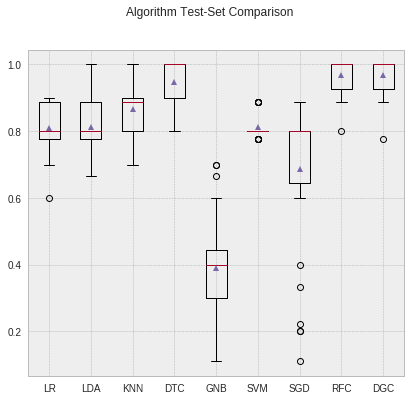

In [210]:
model_test(X_test, y_test)

#### Testing with selected columns

LR mean: 0.828 std: 0.07
LDA mean: 0.818 std: 0.1
KNN mean: 0.911 std: 0.09
DTC mean: 0.902 std: 0.1
GNB mean: 0.299 std: 0.1
SVM mean: 0.811 std: 0.04
SGD mean: 0.744 std: 0.18
RFC mean: 0.915 std: 0.09
DGC mean: 0.909 std: 0.09


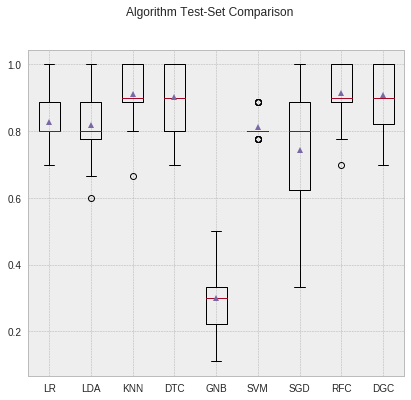

In [211]:
model_test(X_test_sig, y_test_sig)

#### While some of the models performed better on the selected columns data the best results were on the full data

### Real data comparison

In [212]:
def model_real(X, y):
    # Prepare configuration for cross validation test harness
    seed = 7

    # Enter the best model based on testing
    models = [
        ('LR', log_reg,),
        ('LDA', lda),
        ('KNN', knn),
        ('DTC', dtc),
        ('GNB', gnb),
        ('SVM', svm),
        ('SGD', sgd),
        ('RFC', rfc),
        ('GBC', gbc)
    ]

    # Evaluate each model in turn
    scores = []
    names = []

    for name, model in models:
        result = model.score(X, y)
        scores.append(result)
        names.append(name)
        score = round(result.mean(), 3)
        print(name, 'score:', score)

In [213]:
model_real(X1, y1)

LR score: 0.634
LDA score: 0.606
KNN score: 0.92
DTC score: 0.966
GNB score: 0.602
SVM score: 0.53
SGD score: 0.496
RFC score: 0.976
GBC score: 0.962


#### Random forrest performed best

It seems the best way to improve retention is by raising salaries and avoiding work accidents ^-^